In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

g = 9.8 #m/s^2

ndigits = 2

# Esercizi di dinamica del punto materiale

Gli esercizi proposti sono tratti da:

1. Mazzoldi Saggion Voci : Problemi di Fisica generale (MSV)
2. Mazzoldi Nigro Voci : Fisica Vol. 1(MNV)
3. Temi d'esame (TE)

__Programma (orientativo)__

__Lezione 2 - (17 marzo)__ 

Forza peso e vincoli e attriti (moti rettilinei), piano inclinato e combinazione fili e attriti.

Esercizi svolti 2.1 da MNV, 2.19, 2.21, 2.24 e 2.28.

Es. 1 da Esercizi_Dinamica-1.pdf ed Es. 2 da Esercizi_Dinamica-1.pdf 

__Lezione 3 -  (24 marzo)__

Vincoli in moti circolari  (senza utilizzo conservazione dell'energia).
  
Esercizi svolti 2.9, 2.10 e 2.36.
 
Richiamo di cinematica del moto circolare dal cap. 1, esercizio 1.23.

Esercizi Es. 2 da Esercizi_Dinamica-2.pdf, e studio del moto circolare con momento angolare.

__Lezioni 4 e 5 (31 marzo e 7 aprile)__ 

Lavoro delle forze e conservazione energia meccanica.

Esercizi svolti dal capitolo 2 : 2.6, 2.8, 2.11, 2.13, 2.15, 2.17.

Dal capitolo 4 : 4.6, 4.12

## MNV - Esercizio 2.1 pag 327

Una massa $m_1$ è appesa ad una parete orizzontale mediante un filo di massa trascurabile.
Una seconda massa $m_2$ è appesa ad $m_1$ mediante un secondo filo di massa trascurabile.
Calcolare i valori delle tensioni $T_1$ e $T_2$.

Si taglia il filo 1. Durante la caduta il filo è teso?

__Svolgimento__

Scriviamo la componente verticale delle equazioni del moto per le 2 masse.

Scegliamo l'asse verticale orientato verso il basso
$$
m_2 g- T_2 = m_2 a \, , \quad
m_1 g + T_2-T1 = m_1 a
$$
La configurazione di equilibrio corrisponde ad $a=0$. Possiamo calcolare direttamente le tensioni del fili
$$
T_2 = m_2 g \, , \quad
T_1 = (m_1+m_2) g
$$
come si interpretano queste equazioni?

Se il filo 1 viene tagliato le equazioni si riducono a 
$$
m_2 g- T_2 = m_2 a \, , \quad
m_1 g + T_2 = m_1 a
$$
da cui calcoliamo $a$ eliminando $T_2$ dal sistema e successivamente determiamo $T_2$. Si ottiene
$$
a = g \, , \quad T_2 = 0
$$
il sistema è in caduta libera e il filo è esteso ma non teso.

## Esercizio 1 (dalle dispense Esercizi_Dinamica-1)

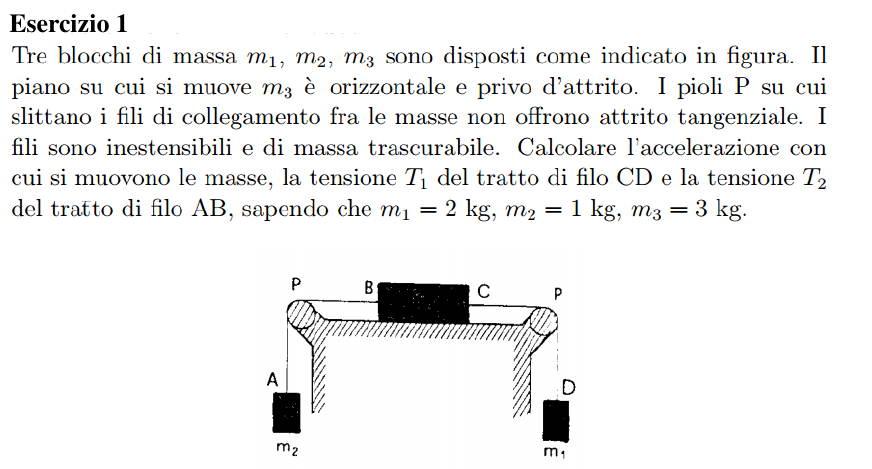

In [7]:
Image('Immagini/Esercizi_Dinamica-1_Es1_Testo.png',width=800)

__Svolgimento__

Scriviamo le componenti rilevanti delle equazioni del moto per ciascuna delle 3 masse. 

In assenza di attrito la reazione vincolare del piano orizzontale bilancia la forza peso su $m_3$.
Ci interessano quindi la componente $z$ delle equazioni del moto per $m_1,m_2$ e quella orizzontale
per $m_3$. I fili sono in tensione e garantiscono che il modulo delle accelerazioni sia lo stesso
per le masse.

Scegliendo un riferimento cartesiano $x,y$ (con l'asse verticale $y$ rivolto verso l'alto) scriviamo
$$
-m_1 g + T_1 = -m_1 a \, , \quad 
-m_2 g + T_2 = m_2 a \, , \quad
T_1-T_2 = m_3 a 
$$
Notate che $a$ è incognito e verrà determinato dalle equazioni del moto, però la scelta dei segni di $a$ per 
le tre masse deve essere fatta in modo coerente!

Con una combinazione lineare delle equazioni eliminiamo le tensioni dei fili e calcoliamo il modulo dell'accelerazione
$$
a = \frac{m_1-m_2}{m_1+m_2+m_3} g
$$
Il segno è stabilito dal confronto fra $m_1$ e $m_2$.
Nota $a$ calcoliamo le tensioni dei fili
$$
T_1 = m_1 (g-a) = m_1 g\frac{2m_2+m_3}{m_1+m_2+m_3}
$$
$$
T_2 = m_2 (g+a) = m_2 g\frac{2m_1+m_3}{m_1+m_2+m_3}
$$
Sostituiamo i valori numerici per il calcolo

In [6]:
m1,m2,m3 = 2,1,3 # kg

In [7]:
mt = m1+m2+m3
a = g*(m1-m2)/mt
T1 = m1*(g-a)
T2 = m2*(g+a)
a_round = round(a,ndigits)
T1_round,T2_round = round(T1,ndigits),round(T2,ndigits)
print('a = %s m/s^2'%a_round)
print('T1 e T2 valgono %s e %s N'%(T1_round,T2_round))

a = 1.63 m/s^2
T1 e T2 valgono 16.33 e 11.43 N


## MSV - Esercizio 2.21

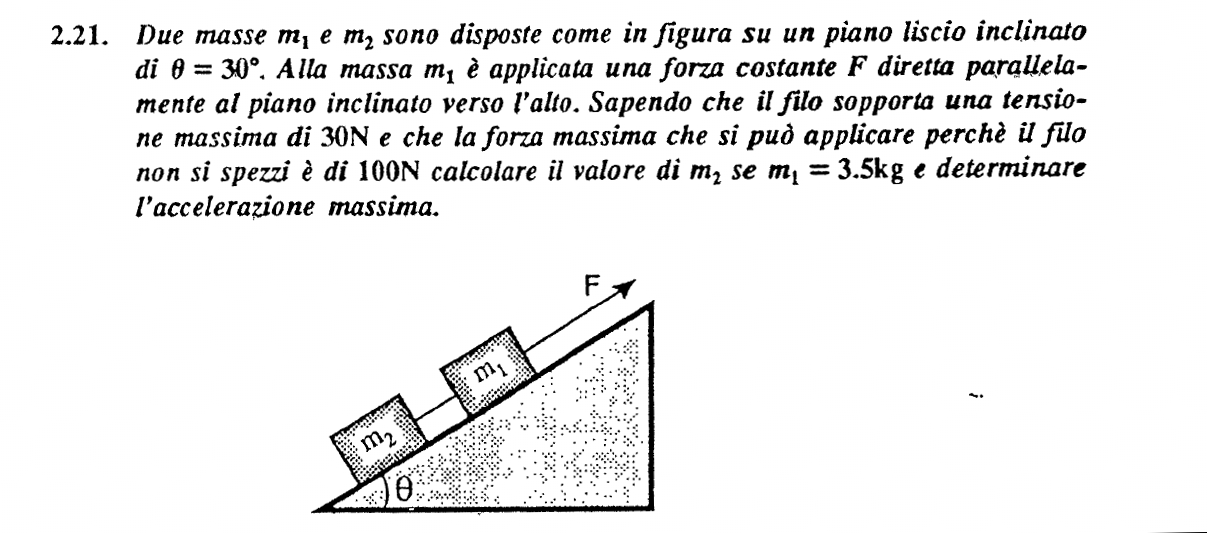

In [4]:
Image('Immagini/MSV_2.21_Testo.png',width=900)

__Lettura del testo__

Dobbiamo determinare le espressioni della accelerazione (uguale fra le 2 masse) e della tensione del filo.

Una volta risolto il sistema esprimiamo i parametri incogniti in funzione di quelli noti.

__Svolgimento__

Scriviamo le equazioni di Newton per le 2 masse e ci interessa la sola componente parallela
alla direzione del piano inclinato. Quindi scegliamo un sistema di riferimento cartesiano con 
l'asse $x$ parllallelo al piano inclinato e diretto come la forza $F$ agente su $m_1$.

Equazioni del moto:
$$
F-T-m_1gsin(\theta) = m_1 a \, , \quad
T-m_2gsin(\theta) = m_2 a
$$
Procediamo come nell'esercizio precedente: eliminiamo $T$ sommando le equazioni, quindi calcoliamo
$a$ e infine sostituiamo $a$ in una equazione per calcolare $T$.
$$
a = \frac{F-(m_1+m_2)gsin(\theta)}{m_1+m_2} \, , \quad
T = \frac{m_2}{m_1+m_2}F
$$
Controlliamo i risultati con analisi dimensionale e conseguenze fisiche delle formule

* l'accelerazione concide con quella di una singola massa $m_1+m2$ (senza filo)

* la tensione del filo _non_ dipende dalla pendenza del piano. Perché?

Per rispondere alla domanda del problema esprimiamo $m_2$ come
$$
m_2 = m_1\frac{T}{F-T}
$$
Infine sostituiamo i valori numerici per il calcolo

In [5]:
m1 = 3.5 # kg
F,T = 100,30 # N
theta = 30*np.pi/180 # rad

In [6]:
m2 = m1*T/(F-T)
m2_round = round(m2,ndigits)
print('m_2 = %s kg'%m2_round)

m_2 = 1.5 kg


In [7]:
a = (F-(m1+m2)*g*np.sin(theta))/(m1+m2)
a_round = round(a,ndigits)
print('a = %s m/s^2'%a_round)

a = 15.1 m/s^2


## MSV - Esercizio 2.19

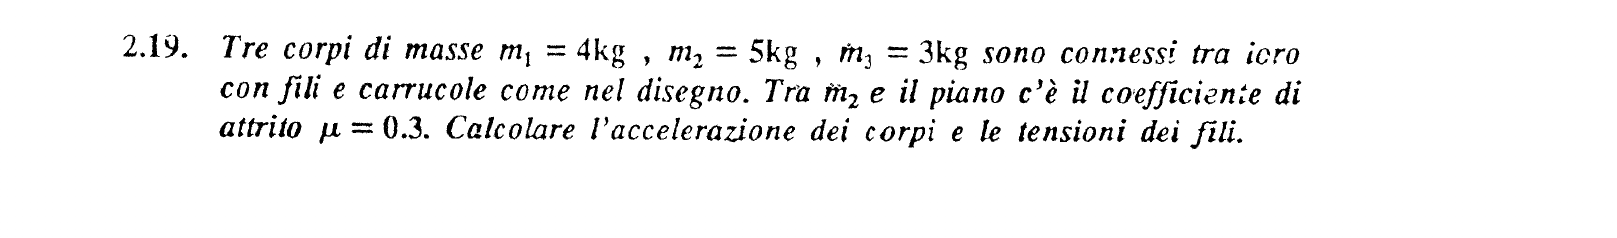

In [3]:
Image('Immagini/MSV_2.19_Testo1.png',width=900)

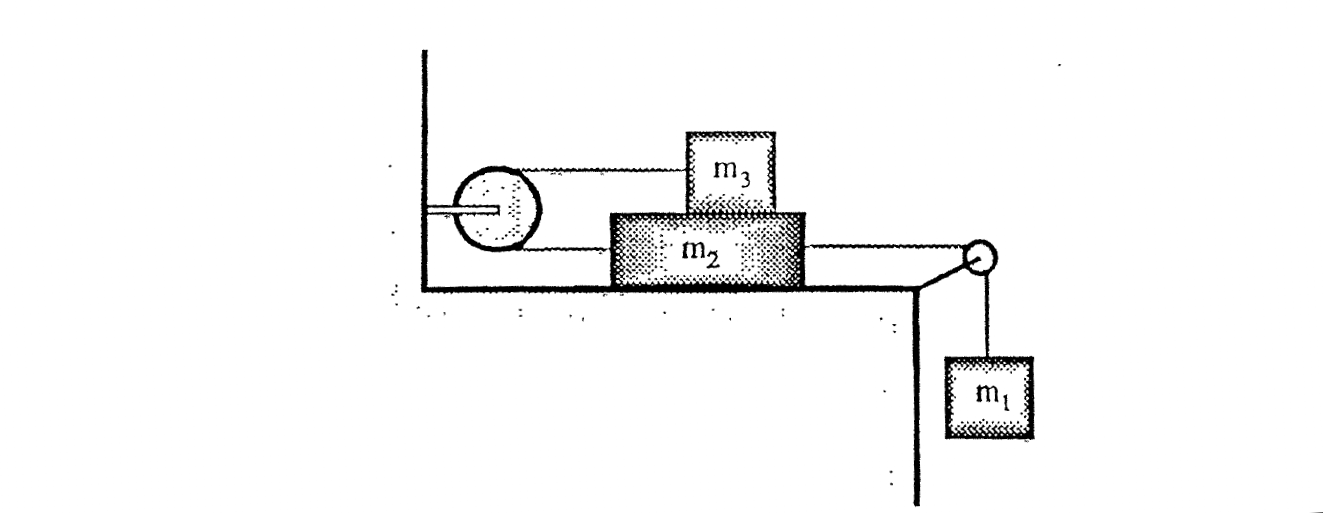

In [4]:
Image('Immagini/MSV_2.19_Testo2.png',width=900)

__Lettura del testo__

I fili in tensione fanno si che il modulo dell'accelerazione sia lo stesso per le tre masse. 

Dobbiamo scrivere le componenti rilevanti per il moto dell'equazione di Newton per le tre
masse e da queste calcolare l'accelerazione e le tensioni dei fili.

__Svolgimento__

Usiamo un sistema di riferimento cartesiano $(x,z)$ con l'asse verticale rivolto verso il basso e scriviamo
le equazioni del moto $\vec{F}=m\vec{a}$ per ciascuna massa.

Massa 1 componente $z$
$$
 m_{1}g - T_1 = m_1 a
$$

Massa 2 componente $x$
$$
T_1-T_2- (m_{2}+m_3)\mu g = m_2 a
$$

Massa 3 componente $x$
$$
-T_2 = -m_3 a
$$
E' conveniente combinare le equazioni per eliminare le tensioni dei fili. Sommiamo le prime due e sottraiamo la terza
$$
m_1 g - (m_{2}+m_3)\mu g  = (m_1+m_2+m_3)a
$$
abbiamo eliminato $T_1$ e $T_2$ e calcoliamo l'accelerazione delle masse
$$
a = \frac{m_1 - (m_{2}+m_3)\mu}{m_1+m_2+m_3}g
$$
Possiamo controllare questa formula in vari modi:

* analisi dimensionale

* confronto con qualche caso semplice, ad esempio $m_3=0$ e attrito nullo

Una volta nota $a$ calcoliamo le tensioni dei fili utilizzando ancora le equazioni del moto delle masse
$$
T_1 = m_1(g-a) \, , \quad 
T_2 = m_3 a 
$$
Infine sostituiamo i valori numerici per il calcolo

In [15]:
m1,m2,m3 = 4,5,3 # kg
mu = 0.3

In [13]:
a = (m1*g-(m2+m3)*mu*g)/(m1+m2+m3)
a_round = round(a,ndigits)
print('a = %s m/s^2'%a_round)

a = 1.31 m/s^2


In [14]:
T1,T2 = m1*(g-a),m3*a
T1_round,T2_round = round(T1,ndigits),round(T2,ndigits)
print('T1 = %s N'%T1_round)
print('T2 = %s N'%T2_round)

T1 = 33.97 N
T2 = 3.92 N


## MSV - Esercizio 2.24

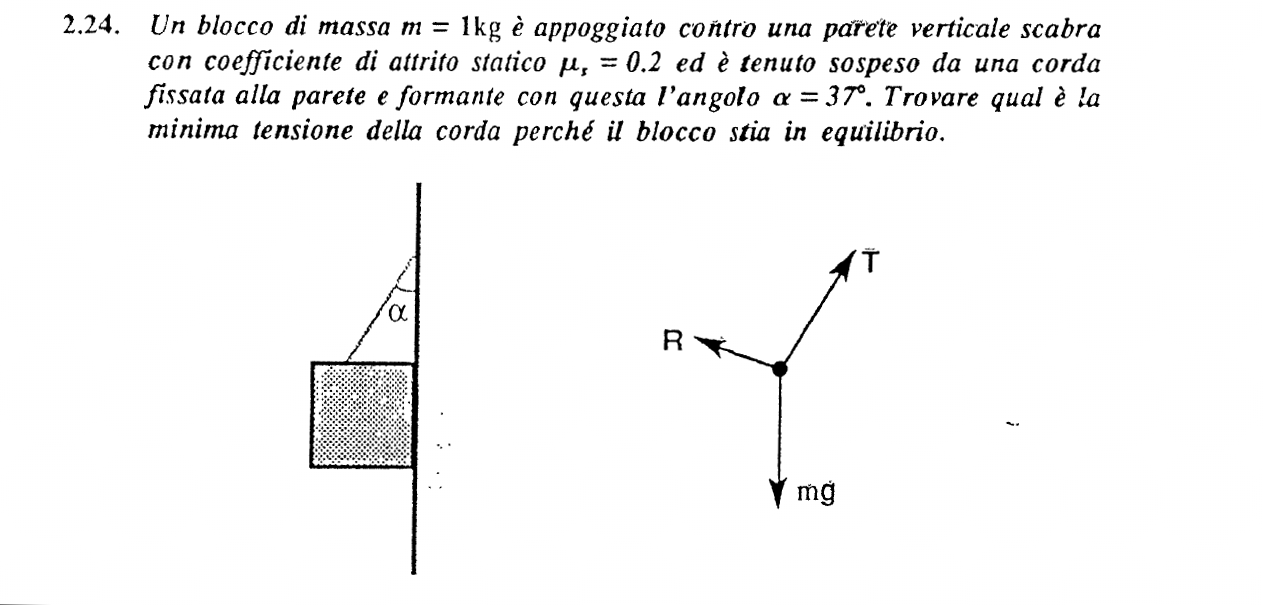

In [8]:
Image('Immagini/MSV_2.24_Testo.png',width=900)

__Svolgimento__

La condizione di equilibrio si realizza se la risultante (vettoriale) di tutte le forze agenti sul sistema è nulla.

In questo caso sul blocco di massa $m$ agiscono la foza peso, la tensione del filo, la reazione vincolare della
parete e la forza di attrito statico (proporzionale alla reazione vincolare).

Proiettiamo tutte le forze in un sistema cartesiano con un asse orizzontale (e quindi ortogonale alla parete)
e uno verticale orientato verso il basso e imponiamo la condizione di equilibrio
$$
Tsin(\alpha) - R_N = 0 \, , \quad
mg-Tcos(\alpha) \leq \mu_s R_N
$$
da cui ricaviamo
$$
T \geq \frac{mg}{\mu_s sin(\alpha)+cos(\alpha)}
$$
La tensione minima si ottiene quando $T$ è uguale al membro di destra.

Infine sostituiamo i valori numerici per il calcolo

In [9]:
m = 1.0 # kg
mu = 0.2
alpha = 37*np.pi/180 # rad

In [10]:
T = m*g/(mu*np.sin(alpha)+np.cos(alpha))
T_round = round(T,ndigits)
print('T = %s N'%T_round)

T = 10.66 N


## Esercizio 1 (dalle dispense Esercizi_Dinamica-2)

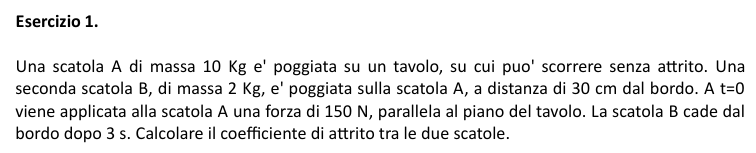

In [9]:
Image('Immagini/Esercizi_Dinamica-2_Es1_Testo.png',width=800)

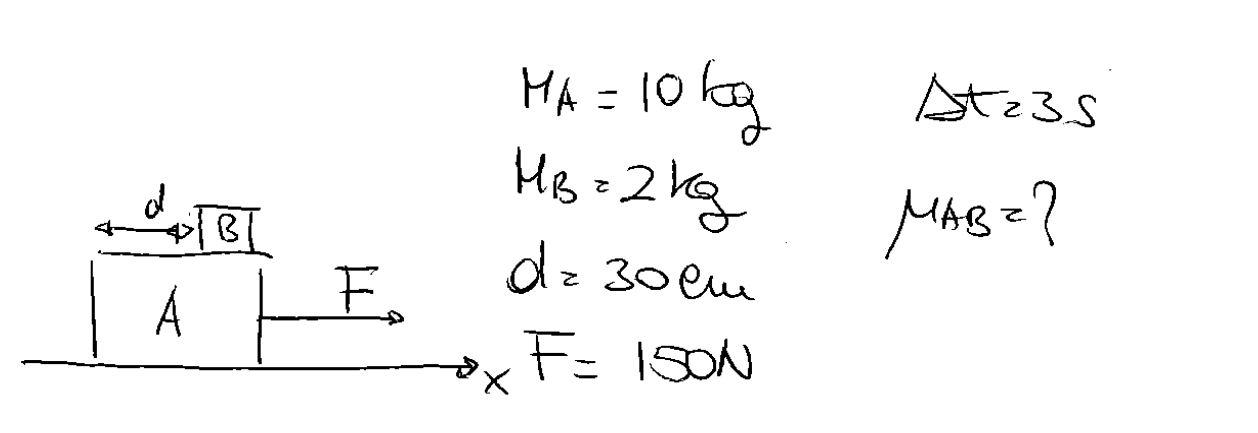

In [12]:
Image('Immagini/Esercizi_Dinamica-2_Es1_Immagine.png',width=800)

__Svolgimento__

Scriviamo la componente orizzontale delle equazioni del moto per le due scatole
$$
\mu m_B g = m_B a_B \, , \quad
F - \mu m_B g = m_A a_A
$$
Notate che l'attrito è la forza responsabile del moto di B e che B esercita su A una forza uguale e contraria.

In questa derivazione abbiamo supposto di essere nel caso n cui l'accelereazione delle due scatole
è differente. 

Affinchè questa condizione sia fisicamente accettabile deve essere $a_A > a_B$ che si traduce in una
condizione sulla forza esterna
$$
F > \mu g (m_A+m_B)
$$
se questa condizione non è verificata i due blocchi si muovo con la stessa accelerazione e il sistema si comporta come 
un blocco unico in cui l'accelerazione è data da $a=F/(m_A+m_B)$.

Torniamo al caso più generale in cui $a_A>a_B$. Abbiamo che $a_B = \mu g$ e sommando le 2 equazioni otteniamo
$$
a_A = \frac{F-\mu m_B g}{m_A}
$$
La scatola $B$ cade quando la differenza fra lo spazio percorso fra A e B è uguale alla distanza di B dal bordo
di A, ovvero quando
$$
d = \frac{1}{2}(a_A-a_B) \Delta t^2
$$
Mettendo tutte le informazioni insieme abbiamo
$$
\frac{F-\mu m_B g}{m_A} - \mu g = \frac{2d}{\Delta t^2}
$$
che risolviamo per $\mu$
$$
\mu = \frac{1}{g}\left( \frac{F}{m_A}-\frac{2d}{\Delta t^2} \right) \frac{m_A}{m_A+m_B}
$$

In [27]:
F = 150 #N
mA,mB = 10,2 #kg
d = 0.3 #m 
Dt = 3 #s

In [28]:
mu = 1/g*(F/mA-2*d/Dt**2)*mA/(mA+mB)
mu_round = round(mu,ndigits)
print("Il coefficiente d'attrito vale %s"%mu_round)

Il coefficiente d'attrito vale 1.27


Studiate l'esercizio 2.33 del MSV nel quale viene considerato il caso più generale che prevede la presenza di attrito anche fra la massa A
e il piano!

## MSV - Esercizio 2.28

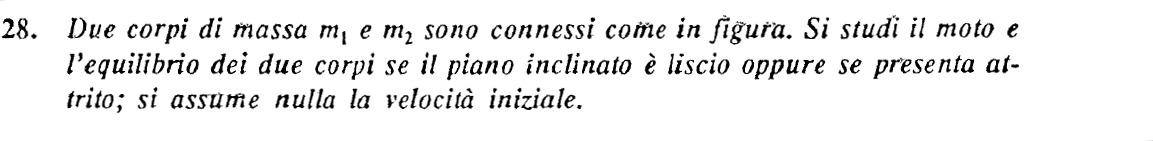

In [9]:
Image('Immagini/MSV_2.28_Testo1.png',width=900)

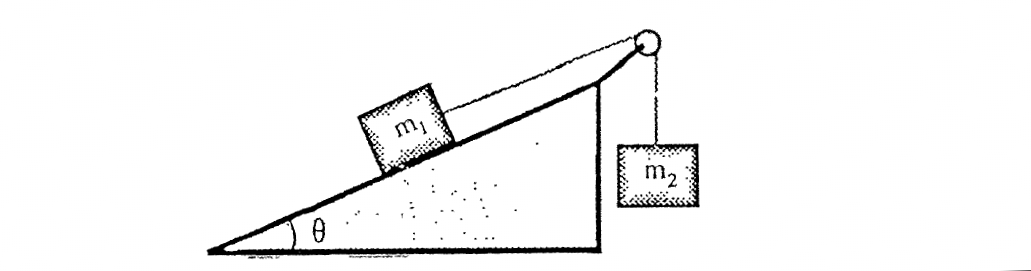

In [11]:
Image('Immagini/MSV_2.28_Testo2.png',width=900)

__Svolgimento__

_Attrito nullo_

Scriviamo al solito le (componenti rilevanti delle) equazioni del moto per le due masse
$$
m_2 g - T = m_2 a \, , \quad
-m_1 g sin(\theta) + T = m_1 a
$$
Da questo sistema di equazioni ricaviamo il modulo dell'accelerazione e la tensione del filo
$$
a = \frac{m_2-m_1sin(\theta)}{m_1+m_2} g \, , \quad
T = m_2(g-a) = \frac{m_1 m_2}{m_1+m_2}g(1+sin(\theta))
$$
Questa è la soluzione dell'analisi dinamica e da qui possiamo studiare il moto generico
del sistema.

Il sistema è in equilibrio se l'accelerazione è nulla. Questa condizione implica che
$$
m_1 sin(\theta) = m_2 \, , \quad T = m_2 g
$$
Se $m_1 sin(\theta) < m_2$ la massa $m_2$ scende lungo la verticale e $m_1$ è trascinata in
alto sul piano inclinato. Mentre nel caso inverso $m_2$ sale e $m_1$ scende lungo il piano inclinato.

_Analisi in presenza di attrito_

Assumendo che la massa $m_2$ scenda lungo la verticale scriviamo le equazioni del moto
$$
m_2 g - T = m_2 a \, , \quad
-m_1 g sin(\theta) -m_1 g cos(\theta) \mu+ T = m_1 a
$$
La condizione di equilibrio statico si realizza se la risultante delle forze sulla massa $m_1$ è minore della forza d'attrito
$$
T-m_1gsin(\theta) \leq \mu_s R_N \, \rightarrow \quad
m_2 \leq m_1(sin(\theta)+\mu_s cos(\theta))
$$
Nel regime dinamico $(a \neq 0)$ risolviamo nuovamente il sistema per $a$ e $T$
$$
a = \frac{m_2-m_1(sin(\theta)+\mu cos(\theta))}{m_1+m_2} g \, , \quad
T = m_2(g-a) = \frac{m_1 m_2}{m_1+m_2}g\big(1+(sin(\theta)+\mu cos(\theta))\big)
$$


Ripetete l'analisi assumento che $m_2$ salga lungo la verticale.

## MSV - Esercizio 2.36

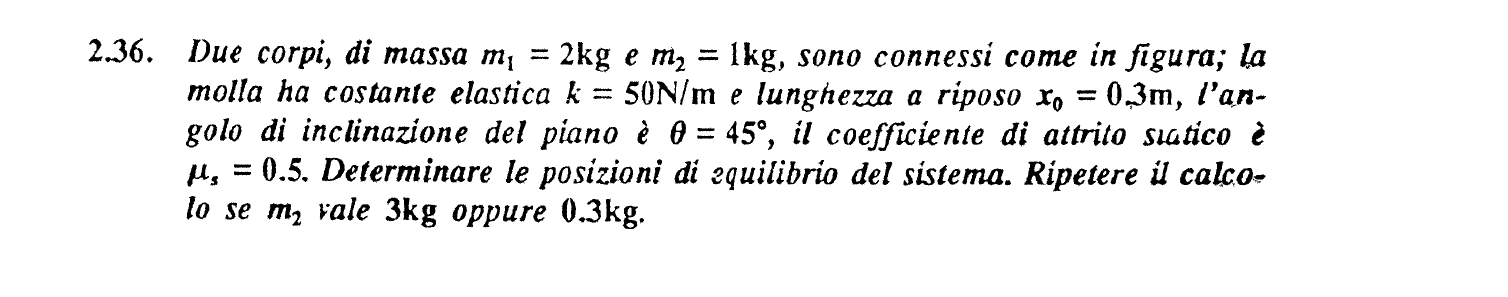

In [10]:
Image('Immagini/MSV_2.36_Testo1.png',width=1000)

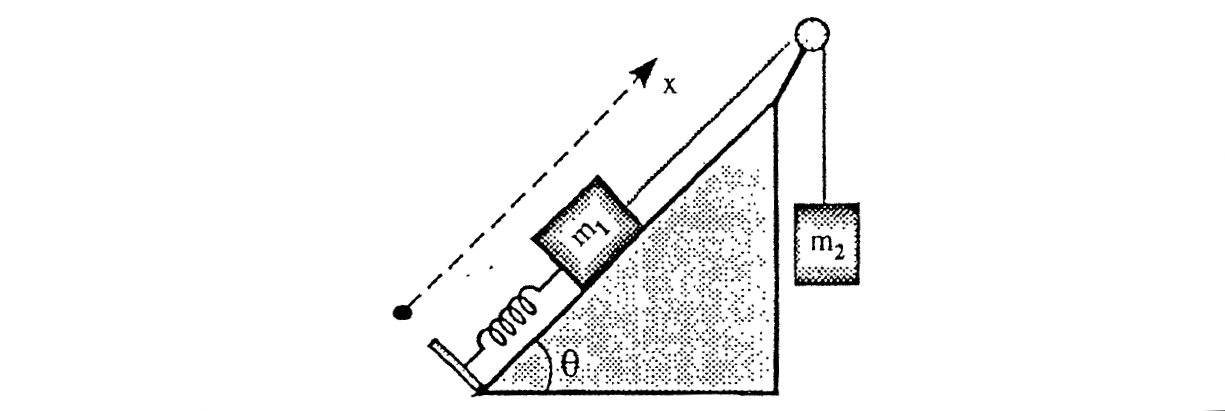

In [11]:
Image('Immagini/MSV_2.36_Testo2.png',width=1000)

__Svolgimento__

Dall'equazione del moto per $m_2$ in condizioni di equilibrio ricaviamo la tensione del filo
$$
T = m_2 g
$$
La risultante delle forze (escluso l'attrito) agente su $m_1$ lungo la direzione del piano inclinato è 
$$
- k \Delta x - m_1 g sin(\theta) + m_2 g 
$$
Il sistema è in equilibrio se il modulo della forza risultante lungo il piano è minore o uguale a $F_s = \mu_s m_1 g cos(\theta)$
$$
|-k\Delta x + A| \leq F_s \, , \quad \rightarrow \left\{  
\begin{array}{c}
-k\Delta x + A \leq F_s\\
k\Delta x - A \geq -F_s\\
\end{array}
\right.
$$
con $A= m_2 g- m_1 g sin(\theta)$.

Aiutiamoci con i valori numerici dei parametri (nel primo caso)

In [5]:
m1,m2 = 2.,1. # kg
k = 50 # N/m
mu = 0.5
theta = 45*np.pi/180 # rad

In [6]:
Fs = mu*m1*g*np.cos(theta)
A = m2*g-m1*g*np.sin(theta)
Fs,A

(6.929646455628166, -4.05929291125633)

Da questo calcolo si deduce che la componente della forza che agisce su $m_1$ dovuta dalla forza
peso e dalla tensione del filo è minore in modulo di $F_s$. In assenza della molla (o nella configurazione
che corrisponde alla sua configurazione di riposo) il sistema è in condizioni di equilibrio statico. 

Se la molla è in estensione la forza di richiamo è concorde ad $A$, e quindi il suo effetto si somma
a quello di $A$. L'equilibrio si mantiene quindi se
$$
k\Delta x + |A| \leq F_s
$$
ovvero
$$
\Delta x \leq \frac{F_s-|A|}{k}
$$
numericamente si ottiene

In [15]:
Dx = (Fs-abs(A))/k
Dx_round = round(Dx,3)
print('Dx <= %s m'%Dx_round)

Dx <= 0.057 m


Se la molla è in compressione la forza di richiamo è opposta ad $A$, in questo caso la condizione è 
$$
k\Delta x -|A| \leq Fs
$$
ovvero
$$
\Delta x \leq \frac{F_s+|A|}{k}
$$
numericamente

In [17]:
Dx = (Fs+abs(A))/k
Dx_round = round(Dx,3)
print('Dx <= %s m'%Dx_round)

Dx <= 0.22 m


Notate che la massima elongazione della molla è maggiore rispetto al caso precedente, perchè la forza della
molla serve in parte per annullare l'effetto di $A$ e in parte per raggiungere il valore limite $F_s$.

Analizzate gli altri casi con lo stesso criterio.

## MSV - Esercizio 2.9

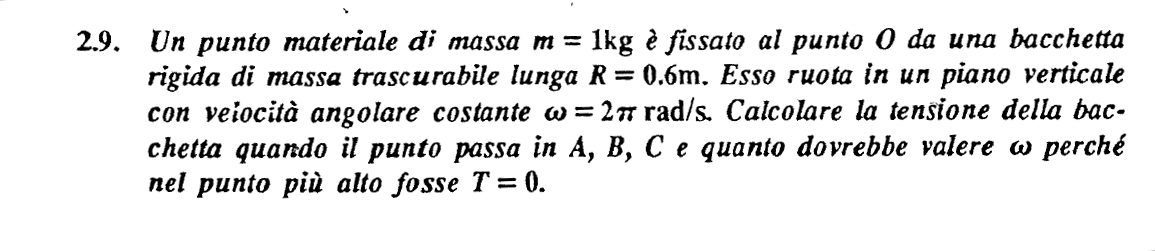

In [14]:
Image('Immagini/MSV_2.9_Testo1.png',width=900)

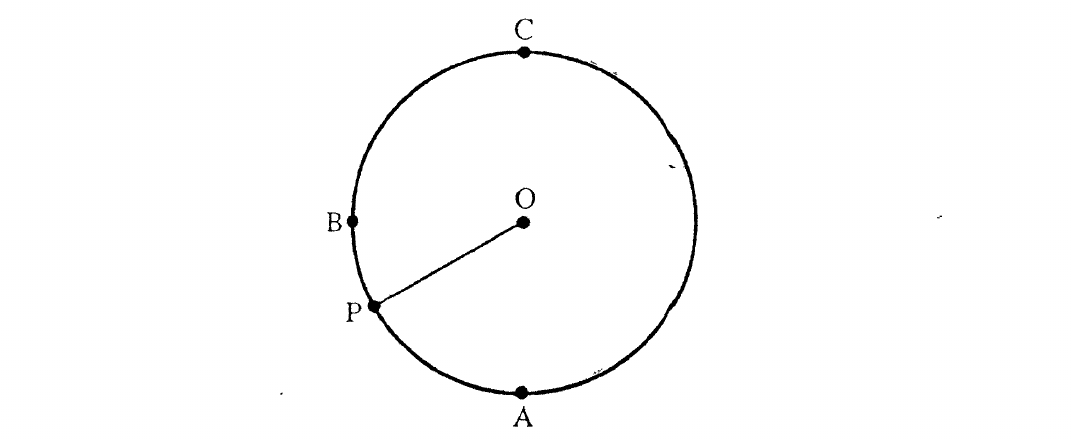

In [13]:
Image('Immagini/MSV_2.9_Testo2.png',width=900)

__Lettura del testo__

Questo è un problema _ibrido_ perchè ci viene fornita la geometria del problema e la presenza della forza
di gravità, ma è anche specificato il tipo di moto (velocità angolare costante). Segno che ci sono altre forze
in gioco non specificate nel testo. 

In questi casi limitatevi ad analizzare le equazioni necessarie per rispondere ai quesiti del testo.

__Svolgimento__

E' la stessa geometria del problema del pendolo (anche se qui è imposta la condizione di velocità angolare costante).

Scegliendo un angolo $\theta$ fra il punto $P$ e l'asse verticale possiamo scrivere le equazioni del moto lungo l'asse
normale al moto come
$$
T-mg cos(\theta) = m a_N = m\omega^2 R
$$
da cui ricaviamo
$$
T = m(gcos(\theta) + \omega^2 R)
$$
e quindi per i punti richiesti abbiamo
$$
T_A = m(g + \omega^2 R) \, , \quad
T_B = m\omega^2 R \, , \quad
T_C = m(-g + \omega^2 R)
$$
Infine sostituiamo i valori numerici per il calcolo

In [12]:
m = 1 # kg
R = 0.6 # m
o = 2*np.pi

In [20]:
TA,TB,TC = m*(g+o**2*R), m*o**2*R, m*(-g+o**2*R) 
TA_round,TB_round,TC_round = round(TA,ndigits),round(TB,ndigits),round(TC,ndigits)
print('T_A = %s N'%TA_round)
print('T_B = %s N'%TB_round)
print('T_C = %s N'%TC_round)

T_A = 33.49 N
T_B = 23.69 N
T_C = 13.89 N


E' possibile sostituire un filo alla bacchetta?

## MSV - Esercizio 2.10

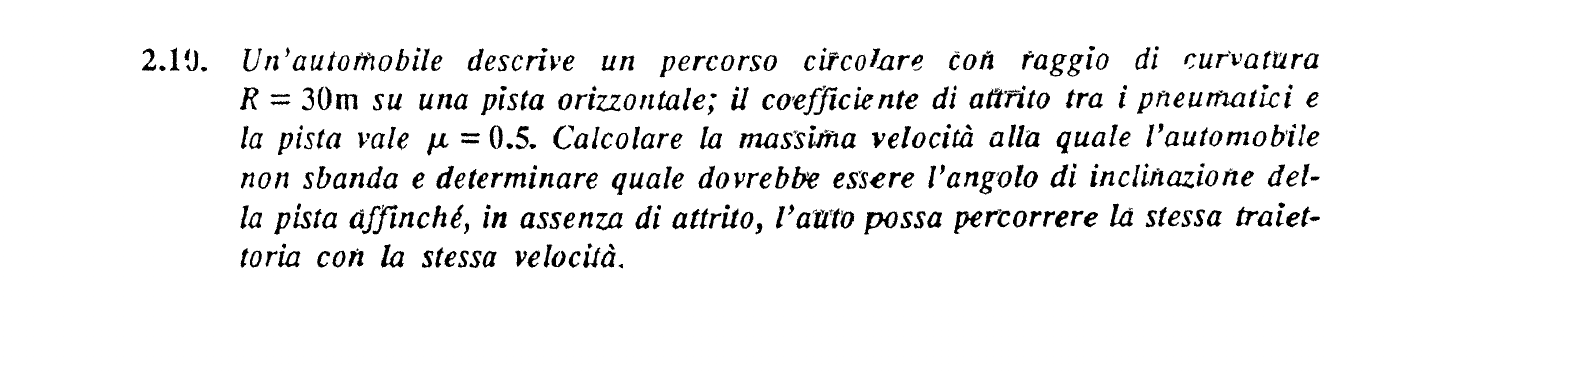

In [6]:
Image('Immagini/MSV_2.10_Testo.png',width=1200)

__Svolgimento__

In questo caso la forza di attrito deve fornire la componente centripeta dell'accelerazione necessaria per
descrivere il moto circolare. 

Nella direzione normale al moto, se il raggio è costante, l'automobile è ferma, quindi siamo in presenza
di un attrito statico fra i pneumatici e il terreno. L'automobile non sbanda se 
$$
m\frac{v^2}{R} \leq \mu m g
$$
La velocità massima è quindi data da $v_{max} = \sqrt{\mu g R}$

Sostituiamo i valori numerici

In [2]:
mu = 0.5
R = 30 #m

In [7]:
v = np.sqrt(mu*g*R)
v_round = round(v,1)
print('La velocità massima vale %s m/s'%v_round)
v_kmh = v_round*3.6
print('Per passare in km/h moltiplichiamo per 3.6, quindi v = %s km/h'%v_kmh)

La velocità massima vale 12.1 m/s
Per passare in km/h moltiplichiamo per 3.6, quindi v = 43.56 km/h


In assenza di attrito, se il moto avviene su una pista inclinata è la componente orizzontale della reazione vincolare
che fornisce la forza centripeta necessaria per mantenere l'automobile in assetto.

La reazione vincolare è ortogonale alla pista (non c'è attrito) e il suo modulo deve essere calcolato 
usando le equazioni del moto
$$
N_x = Nsin(\theta) = m \frac{v^2}{R} \, , \quad
N_y = Ncos(\theta) = mg
$$
notate che l'angolo di $N$ con l'asse orizzontale è $\pi/2-\theta$, da cui seguono le proiezioni scritte sopra.
Da queste equazioni segue le relazione cercata fra pendenza della pista e velocità
$$
tg(\theta) = \frac{v^2}{gR}
$$

## Esercizio 2 (dalle dispense Esercizi_Dinamica-2)

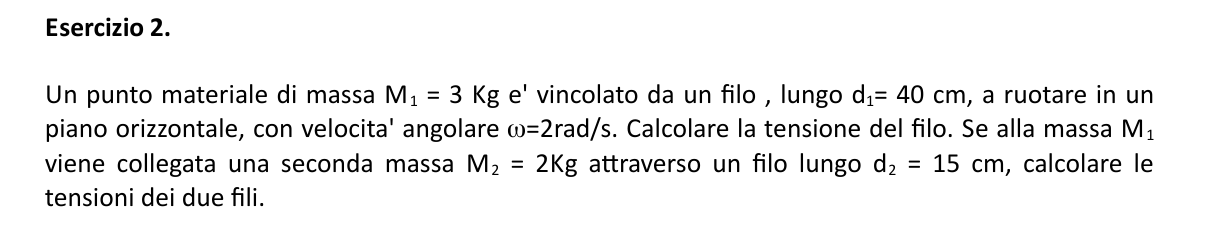

In [3]:
Image('Immagini/Esercizi_Dinamica-2_Es2_Testo.png',width=900)

__Svolgimento__

Per rispondere al primo quesito analizziamo le equazioni del moto per $m_1$. 
In particolare la componente normale lega la tensione del filo all'accelerazione
centripeta necessaria per descrivere il moto circolare
$$
T = m_1 \omega^2 d_1
$$
Date le condizioni cinematiche del problema quanto vale la forza tangente al moto?

In presenza della seconda massa $m_2$ le componenti normali delle equazioni del moto
si scrivono come
$$
T_1-T_2 = m_1 \omega^2 d_1 \, , \quad
T_2 = m_2 \omega^2(d_1+d_2)
$$
da cui ricaviamo
$$
T_1 = \omega^2\big(m_1d_1+m_2(d_1+d_2)\big)
$$
Infine sostituiamo i valori numerici. Nel primo caso

In [9]:
m1,m2 = 3,2 # kg
d1,d2 = 0.4,0.15 #m
omega = 2 #rad/s

In [10]:
T1 = m1*omega**2*d1
T1_round = round(T1,ndigits)
print('La tensione del filo vale %s N'%T1_round)

La tensione del filo vale 4.8 N


Nel secondo caso si ottiene

In [13]:
T2 = m2*omega**2*(d1+d2)
T1 = T2+m1*omega**2*d1
T1_round,T2_round = round(T1,ndigits),round(T2,ndigits)
print('La tensione del filo 1 vale %s N'%T1_round)
print('La tensione del filo 2 vale %s N'%T2_round)

La tensione del filo 1 vale 9.2 N
La tensione del filo 2 vale 4.4 N


## Momento angolare nel moto piano (e nel moto circolare)

Analizziamo il momento angolare in un moto nel piano e
descriviamo il moto circolare di un punto materiale in termini del suo momento angolare,
per mostrare che la descrizione è equivalente a quella già vista in termini della forza.

Scriviamo il momento angolare per un generico moto piano e scegliamo l'origine come polo per il calcolo
$$
\vec{L} = \vec{r} \wedge m \vec{v}
$$
e utilizzando le coordinate polari (nel piano del moto)
$$
\vec{r} = r\vec{u_r} \, , \quad
\vec{v} = \dot{r}\vec{u_r} + r\dot{\theta}\vec{u_{\theta}}
$$

Il momento angolare è perpendicolare al piano del moto si esprime come 
$$
\vec{L} = m r^2 \vec{\omega} 
$$
dove $\vec{\omega}$ è il vettore velocità angolare, perpendicolare al piano del moto e con modulo
$$
\omega = \dot{\theta} = \frac{d\theta}{dt}
$$
In un moto
piano la direzione di $\vec{\omega}$, e quindi quella di $\vec{L}$ si mantengono costanti nel
tempo.

In un moto circolare il vettore normale, caratteristico della descrizione intrinseca del moto fatta rispetto alla
traiettoria, coincide col vettore radiale della descrizione in termini di coordinate polari. 
Nella stessa situazione il versore tangente rispetto alla traiettoria coincide con quello polare trasverso.

La componente normale delle equazioni del moto garantisce l'accelerazione centripeta necessaria
per descrivere la traiettoria circolare
$$
F_n = m \frac{v^2}{r}
$$
e quella tangente determina la variazione della velocità angolare nel tempo
$$
F_t = mr\frac{d^2\theta}{dt^2} = mr\dot{\omega}
$$
La descrizione della dinamica in termini del momento angolare è basata sull'equazione
$$
\frac{d\vec{L}}{dt} = \vec{M} \, , \quad con \quad
\vec{M} = \vec{r} \wedge \vec{F}
$$
dove $\vec{M}$ è il momento delle forze agenti sul punto materiale e abbiamo scelto il centro della
circonferenza (origine delle coordinate) come polo per il calcolo dei momenti. 

Osserviamo che $F_n$ da un contributo nullo a $\vec{M}$ perchè è parallela ad $\vec{r}$. 
Invece il contributo di $F_t$ si scrive come
$$
mr^2\frac{d\omega}{dt} = rF_t
$$
che è equivalente all'equazione del moto relativa alla componente tangente della forza.

## MSV - Esercizio 2.13

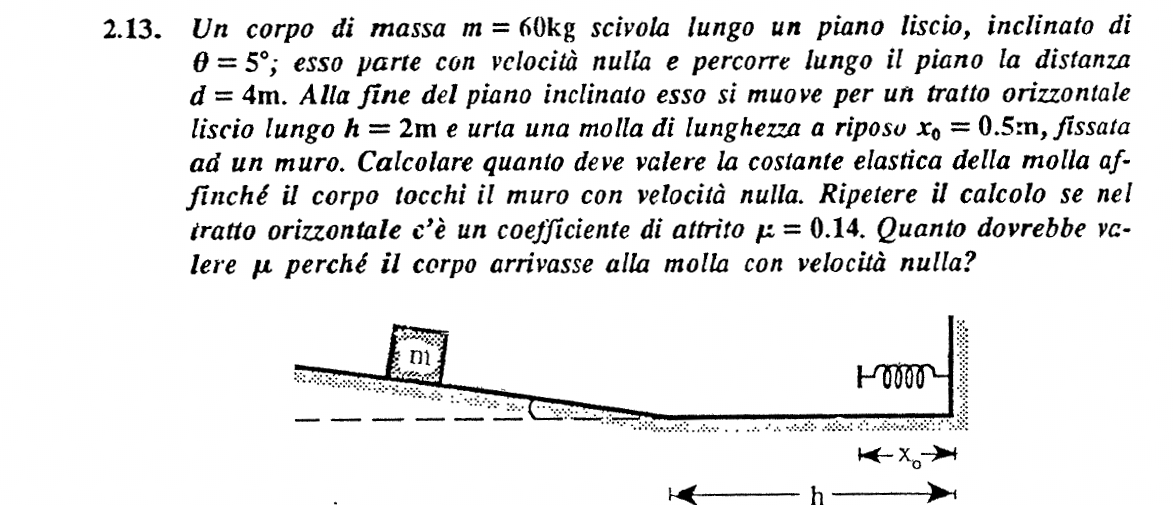

In [2]:
Image('Immagini/MSV_2.13_Testo.png',width=1000)

__Svolgimento__

Possiamo calcolare l'energia cinetica (e quindi la velocità) del corpo nel momento in cui impatta
con la molla utilizzando la conservazione dell'energia meccanica (cinetica+potenziale gravitazionale).

La variazione di quota si scrive come
$$
\Delta z = dsin(\theta)
$$
e produce una diminuzione dell'energia potenziale gravitazionale 
$$
\Delta V_g = -mg \Delta z
$$
che viene convertita in energia cinetica $\Delta E_k = - \Delta V$, ovvero
$$
\frac{1}{2}m v_0^2 = mg\Delta z
$$
Notate che in queste condizioni la lunghezza del tratto orizzontale è irrilevante ai fini della determinazione
dell'energia cinetica al momento dell'impatto con la molla. 

Il corpo tocca il muro con velocità nulla se tutta l'energia cinetica è convertita in energia potenziale
della molla in seguito alla compressione, ovvero
$$
mg \Delta z = \frac{1}{2}k x_0^2
$$
da cui determiniamo $k$,
$$
k = \frac{2mg d sin(\theta)}{x_0^2}
$$
Sostituiamo i valori numerici

In [2]:
m = 60 #kg
theta = np.pi/180*5 
h,d,x0 = 2,4,0.5 #m
mu = 0.14

In [7]:
k = 2*m*g*d*np.sin(theta)/x0**2
k_round = round(k,1)
print('La costante della molla vale %s N/m'%k_round)

La costante della molla vale 1639.9 N/m


In presenza di attrito bisogna includere nel bilancio energetico anche il lavoro della forza di attrito lungo il tratto orizzontale, quindi
$$
mg\Delta z - \mu mg h = \frac{1}{2}k x_0^2
$$
Questa equazione ci dice che l'energia iniziale (potenziale gravitazionale) meno quella dissipata per attrito viene convertita in energia
potenziale della molla. In queste condizioni troviamo
$$
k = \frac{2mg(d sin(\theta)-\mu h)}{x_0^2}
$$
Sostituiamo i valori numerici



In [14]:
k = 2*m*g*(d*np.sin(theta)-mu*h)/x0**2
k_round = round(k,1)
print('La costante della molla vale %s N/m'%k_round)

La costante della molla vale 322.8 N/m


Infine il corpo arriva alla molla con velocità nulla se tutta l'energia inziale è dissipata per attrito nel tratto $h-x_0$, quindi
$$
m g d sin(\theta) = \mu mg (h-x_0)
$$
e quindi il coefficiente d'attrito che realizza questa condizione è 
$$
\mu = \frac{dsin(\theta)}{h-x_0}
$$
Numericamente otteniamo

In [13]:
mu2 = d*np.sin(theta)/(h-x0)
mu2_round = round(mu2,2)
print("Il coefficiente d'attrito vale %s "%mu2_round)

Il coefficiente d'attrito vale 0.23 


## MSV - Esercizio 2.6

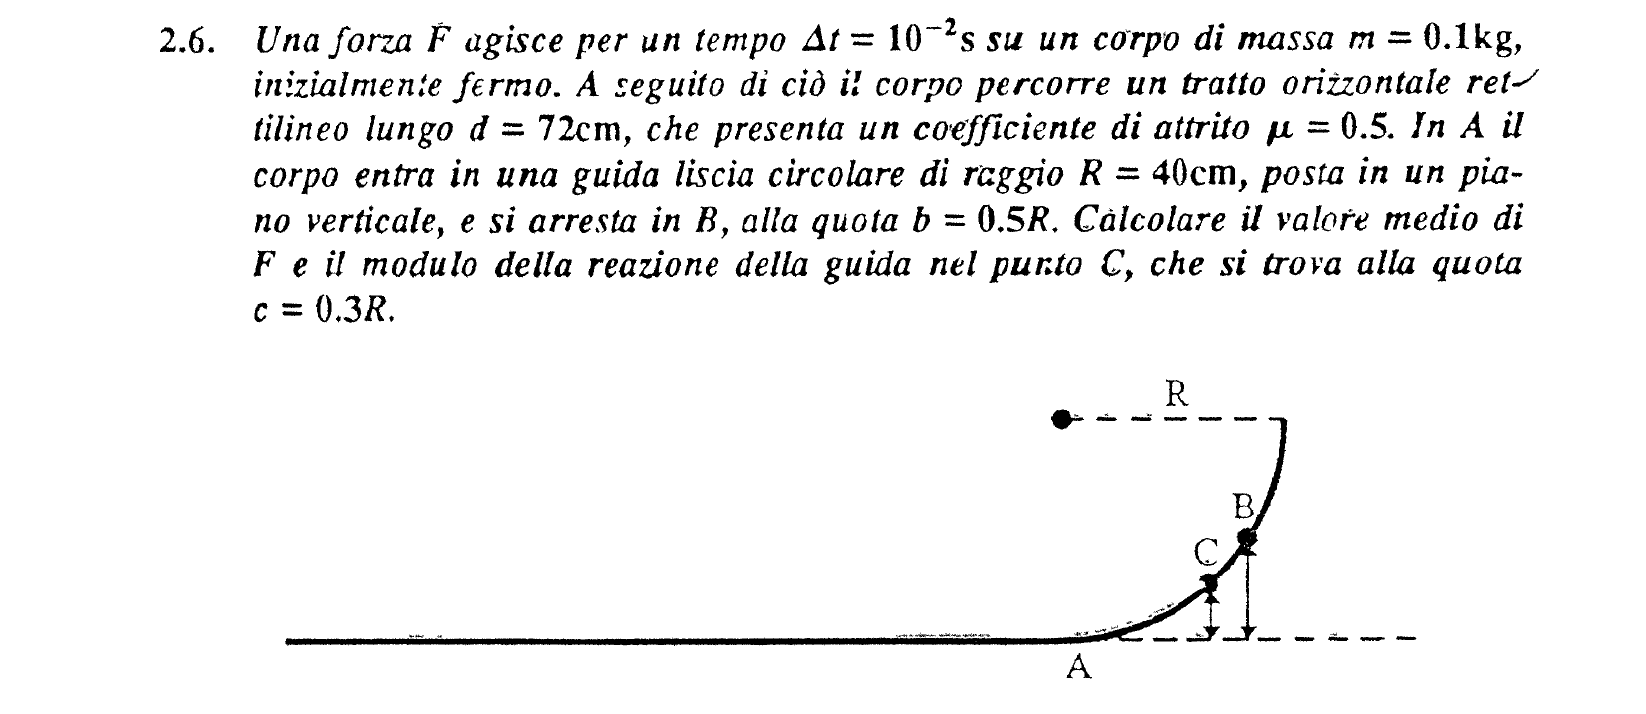

In [3]:
Image('Immagini/MSV_2.6_Testo.png',width=1000)

__Svolgimento__

Applicando il teorema dell'impulso (consideriamo la forza costante, con valore pari al suo valor medio per la durata
di applicazione della forza sul corpo) esprimiamo la velocità iniziale come
$$
v_0 = \frac{\bar{F}\Delta t}{m}
$$
Usiamo il lavoro della forza di attrito per esprimere la variazione di energia cinetica al termine del tratto rettilineo
$$
\frac{m}{2}\left(v_A^2-v_0^2\right) = -\mu mg d
$$
da cui otteniamo 
$$
\frac{m}{2}v_A^2 = \frac{1}{2}\frac{\bar{F}^2 \Delta t^2}{m} - \mu m h
$$
Ora utilizziamo la conservazione dell'energia meccanica (la guida è liscia, quindi è presente la sola reazione vincolare
che non contribuisce al bilancio energetico del moto)
$$
\frac{m}{2}v_A^2 = mg\frac{R}{2}
$$
Abbiamo quindi tutti gli elementi necessari per rispondere al primo quesito del problema. Notate la semplicità della 
soluzione, grazie all'utilizzo dell'energia, e osservate che abbiamo ignorato molti dettagli meccanici del problema,
sempre in virtù del fatto che abbiamo usato leggi di conservazione piuttosto che l'analisi diretta delle equazioni del moto.

Scriviamo quindi l'espressione per il valor medio della forza
$$
\bar{F} =\frac{m}{\Delta t} \sqrt{gR+2\mu g d}
$$
Sostituendo i valori numerici

In [11]:
Dt = 1e-2 #s
mu = 0.5
m = 0.1 # kg
d = 0.72 #m
R = 0.4 #m
c = 0.3*R # m

In [10]:
F = m/Dt*np.sqrt(g*R+2*mu*g*d)
F_round = round(F,ndigits)
print('Il valor medio di F è  = %s N'%F_round)

Il valor medio di F è  = 33.13 N


Per calcolare la reazione vincolare nel punto indicato usiamo le equazioni del moto 
$$
N_C-mg cos(\theta_C) = m\frac{v_C^2}{R}
$$
Usiamo anche la conservazione dell'energia meccanica per esprimere il valore della reazione vincolare in funzione 
della sola configurazione (ovvero della quota del punto sulla guida nel caso specifico). In particolare calcoliamo
la velocità associata alla quota C, sapendo che alla quota $B=R/2$ il punto si arresta
$$
-\frac{1}{2}m v_C^2 = - mg\left(\frac{R}{2}-c \right)
$$
da cui otteniamo
$$
v_C^2 = 2g\left(\frac{R}{2}-c \right)
$$
Inoltre vale la condizione $Rcos(\theta_C)+c = R$ da cui segue che  $cos(\theta_C) = 1- c/R$. 

In definitiva abbiamo quindi
$$
N_C = mg \left(1-\frac{c}{R}\right) + \frac{mg}{R}\left(\frac{R}{2}-c\right)
 = 
mg \left(2 - \frac{3c}{R} \right)
$$
Sostituiamo i valori numerici

In [14]:
Nc = m*g*(2-3*c/R)
Nc_round = round(Nc,ndigits)
print('La reazione vincolare in c vale  = %s N'%Nc_round)

La reazione vincolare in c vale  = 1.08 N


## MSV - Esercizio 2.8

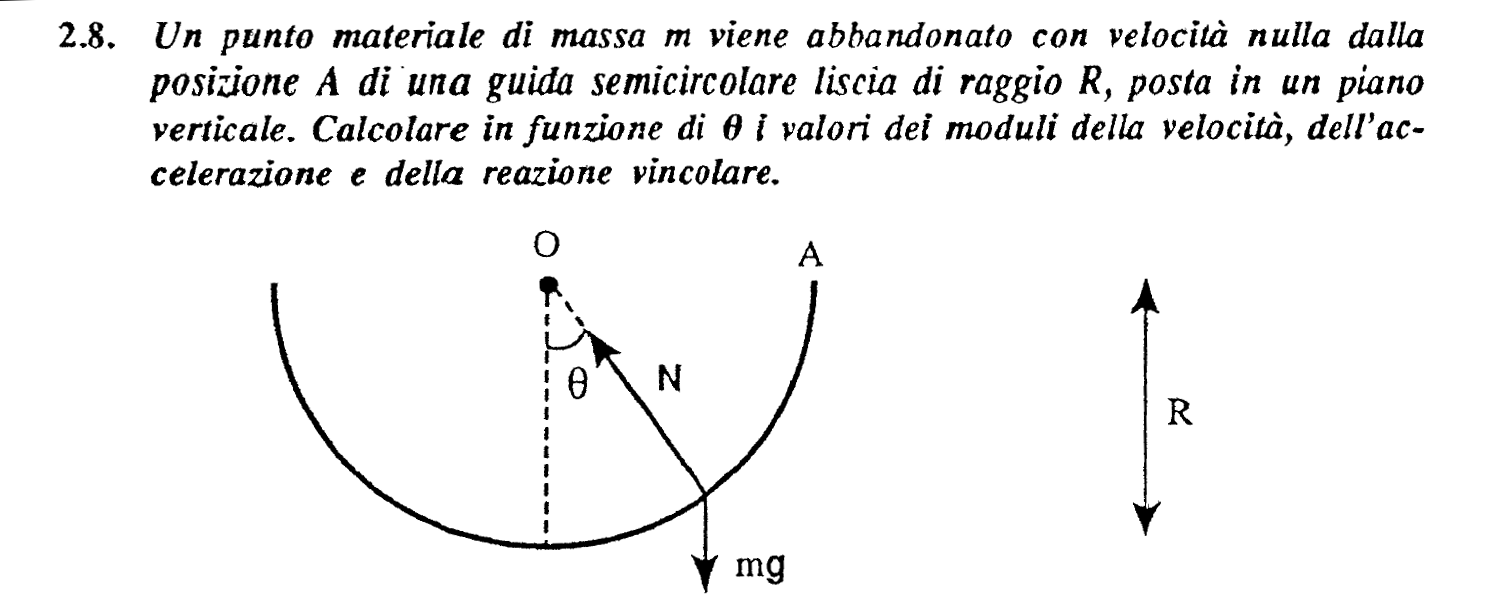

In [15]:
Image('Immagini/MSV_2.8_Testo.png',width=900)

__Svolgimento__

Al solito scriviamo le equazioni del moto proiettate lungo gli assi normale e tangente alla guida circolare (se fosse un 
pendolo sarebbe la stessa cosa).

L'equazione per la componente normale contiene la reazione vincolare
$$
N-mg cos(\theta) = m\frac{v^2}{R}
$$
mentre quella lungo l'asse tangente è
$$
m a_t = -mg sin(\theta)
$$
Da cui abbiamo
$$
N = m\left( g cos(\theta) + \frac{v^2}{R} \right) \, , \quad
a_t = -g sin(\theta)
$$
Per rispondere al quesito del testo dobbiamo esprimere accelerazione tangente e reazione vincolare in funzione della sola
configurazione, ovvero dell'angolo $\theta$ che individua la posizione del punto sulla guida. 

Potremmo utilizzare le equazioni del moto, risolverle e calcolare $v$. Purtroppo ci troviamo nella stessa situazione delle equazioni 
del pendolo semplice ma l'approssimazione di piccole oscillazioni non è applicabile. 
E' però possibile (e in generale SEMPRE conveniente) utilizzare la conservazione dell'energia meccanica.

L'energia potenziale gravitazione _cresce_ con l'altezza. Scegliendo lo _zero_ nel punto più basso della guida si esprime in funzione
della configurazione come $mgR (1-cos(\theta))$. Applichiamo quindi la conservazione dell'energia meccanica
$$
mgR = \frac{1}{2}m v^2(\theta) + mgR(1-cos(\theta))
$$
da cui ricaviamo la velocità (con uno sforzo minimo, se comparato con quello necessario per affrontare le equazioni del moto!)
$$
v^2(\theta) = 2gRcos(\theta)
$$
Nota la velocità, calcoliamo il modulo della reazione vincolare e l'accelerazione normale
$$
a_N = \frac{v^2}{R} = 2gcos(\theta) \, , \quad
N = 3mg cos(\theta)
$$
e infine il modulo dell'accelerazione
$$
a = g\sqrt{4cos^2(\theta)+sin^2(\theta)} = g\sqrt{1+3cos^2(\theta)} 
$$

## MSV - Esercizio 2.11

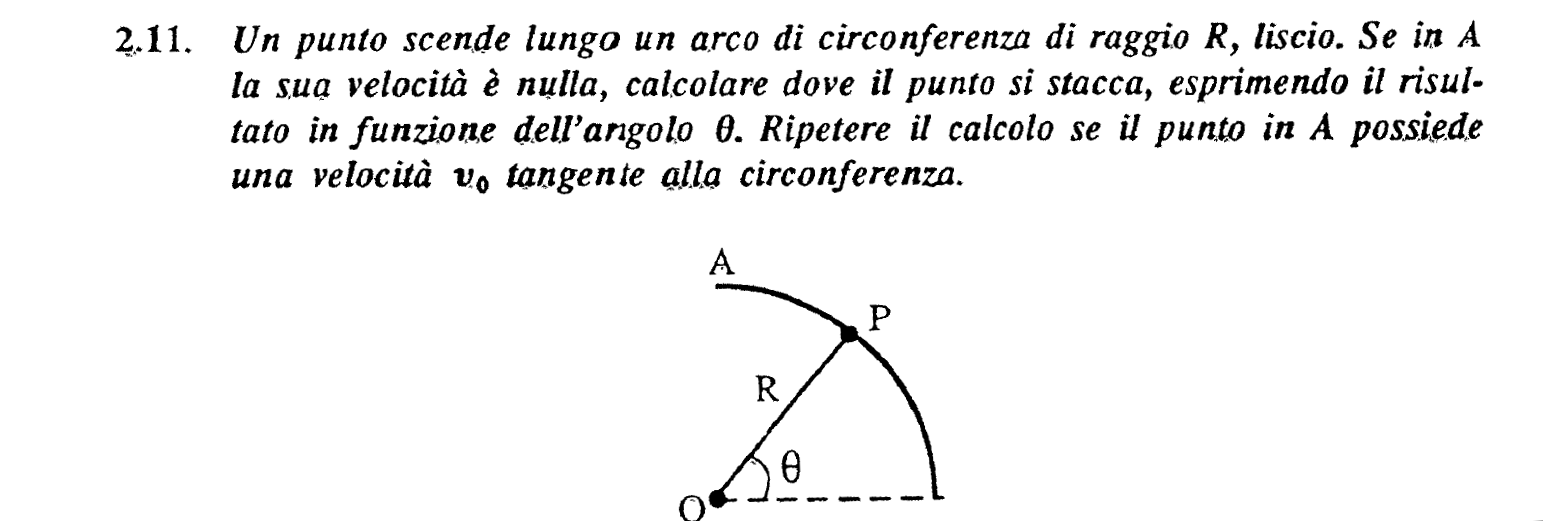

In [5]:
Image('Immagini/MSV_2.11_Testo.png',width=1000)

__Svolgimento__

Scriviamo la componente delle equazioni del moto lungo l'asse normale (orientato verso il centro della guida)
$$
N+ mg sin(\theta) = m \frac{v^2}{R} , \quad \rightarrow \quad
N = m \left( \frac{v^2}{R} - gsin(\theta) \right)
$$
affinchè il punto materiale non si stacchi dalla guida deve essere $N<0$. 

Usiamo la conservazione dell'energia (per una velocità inziale $v_0$ arbitraria)
$$
\frac{1}{2}m v_0^2 + mgR = \frac{1}{2}m v^2 + mgRsin(\theta) 
$$
da cui ricaviamo $v^2$ e quindi espriamo $N$ in funzione della configurazione
$$
v^2 = v_0^2 + 2gR\left(1-sin(\theta)\right) \, , \quad
N = m \left( \frac{v_0^2}{R} + g(2-3sin(\theta)) \right)
$$
Il distacco avviene quando $N$ = 0, ovvero quando $sin(\theta) = 2/3$, che corrisponde a $\theta \simeq 41,8$ gradi.

Se $v_0 \neq 0$, il distacco avviene prima e per $v^2_0 \geq Rg$ il punto si stacca in A.

__Suggerimento:__ Fate l'esercizio 2.12 del MSV 

## MSV - Esercizio 2.15

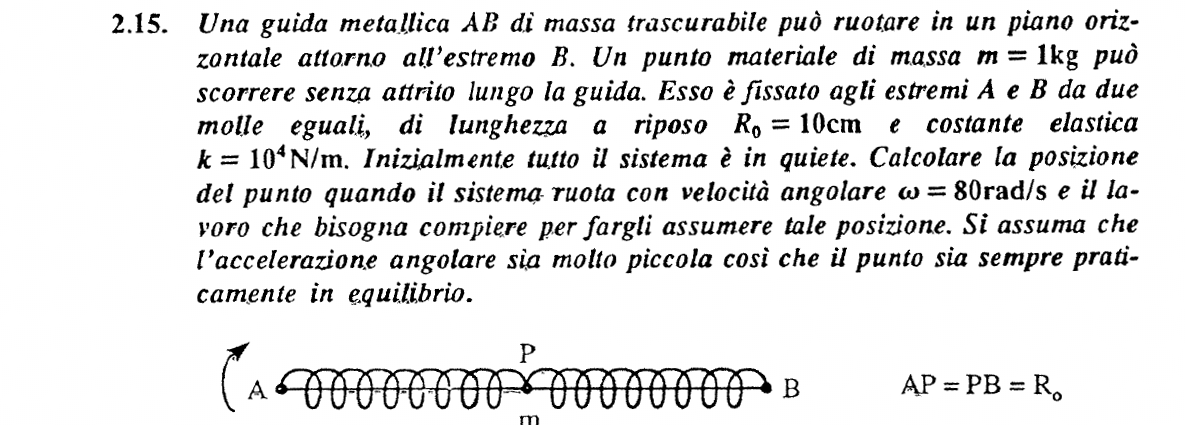

In [3]:
Image('Immagini/MSV_2.15_Testo.png',width=1000)

__Svolgimento__

Osservazione preliminare : come si comporta il sistema di due molle descritto in figura? E' possibile
sostituire una sola molla _equivalente_ che dia la stessa risposta meccanica?

A regime la configurazione di equilibrio si determina imponendo che l'azione esercitata dalle molle
produca la forza centripeta necessaria per realizzare il moto
$$
2k \Delta x = m\omega^2(R_0+\Delta x)
$$
Notate che $\Delta x > 0$, ovvero P si sposta verso A, perchè la forza esercitata dall molle deve essere diretta 
verso il centro di rotazione (B). 
Otteniamo quindi
$$
\Delta x = \frac{m\omega^2 R_0}{2k-m\omega^2}
$$
Sostituiamo il valori numerici per il calcolo

In [22]:
omega = 80 #rad/s
m = 1 #kg
R0 = 0.1 #m
k = 1e4 #N/m

In [27]:
dx = m*omega**2*R0/(2*k-m*omega**2)
dx_round = round(dx,ndigits)
print('dx vale %s m'%dx_round)

dx vale 0.05 m


L'energia meccanica è composta da un termine cinetico associato al moto rotatorio di P attorno al centro,
e di un contributo di energia potenziale, dovuto alla compressione delle molle
$$
E_k =  \frac{1}{2}m \omega^2 (R_0+\Delta x)^2
$$
$$
V = 2 \frac{1}{2}k (\Delta x)^2
$$
Il lavoro da fornire uguaglia l'energia meccanica del sistema a regime, ovvero
$$
L = E_k + V
$$
Seguendo le indicazioni del testo abbiamo trascurato la possibilità che il punto P oscilli rispetto alla posizione di equilibrio. 

In [28]:
Ek = 0.5*m*omega**2*(R0+dx)**2
V = k*dx**2
L = Ek+V
L_round = round(L,ndigits)
print('Il lavoro totale da compiere sul sistema vale %s J'%L_round)

Il lavoro totale da compiere sul sistema vale 91.35 J


## MSV - Esercizio 4.6

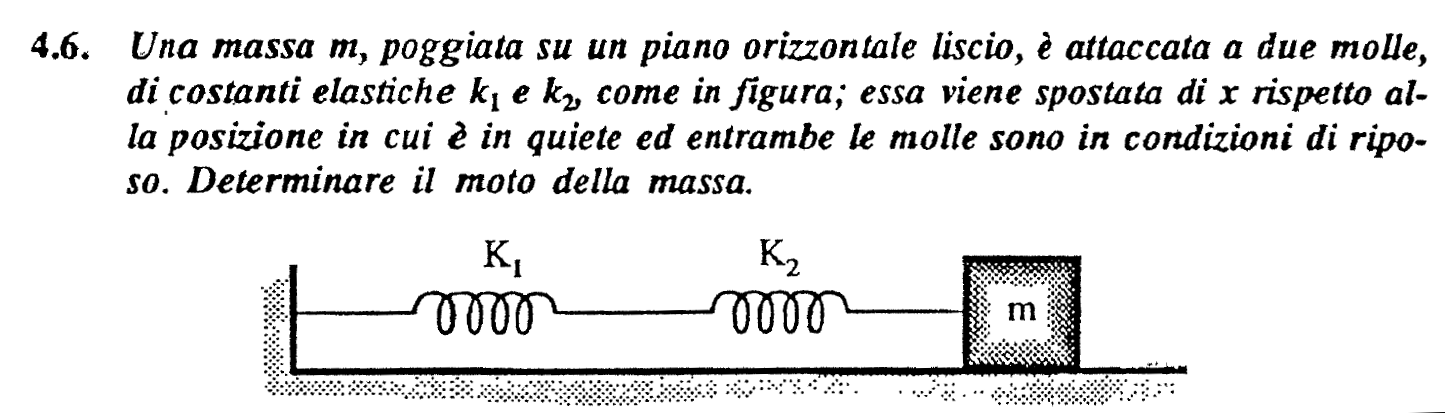

In [2]:
Image('Immagini/MSV_4.6_Testo.png',width=900)

__Svolgimento__

La forza che agisce su $m$ è uguale alla forza che forma ciascuna delle due molle.
Per capirlo ragionate a partire dalla massa $m$ che in virtù della forza applicata 
tira l'estremo destro di $k_2$ con la forza $F$. $k_2$ si deforma sotto l'azione di $F$
e l'estremo sinistro di $k_2$ risente della forza di richiamo (pari a $F$). La stessa forza
è veicolata dal tratto di filo fino all'estremo destro di $k_1$ e il ragionamento si ripete.

Per cui abbiamo
$$
x = x_1+x_2 = \frac{F}{k} \, , \quad
x_1 = \frac{F}{k_1} \, , \quad x_2 = \frac{F}{k_2}
$$
ne segue che
$$
\frac{1}{k} = \frac{1}{k_1}+\frac{1}{k_2} \, \quad \rightarrow \quad
k = \frac{k_1 k_2}{k_1+k_2}
$$
che fornisce l'espressione della costante _equivalente_ di due molle in serie.

Il moto del sistema è armonico con pulsazione
$$
\omega = \sqrt{\frac{k}{m}} = \sqrt{\frac{k_1 k_2}{m(k_1+k_2)}} 
$$

## MSV - Esercizio 2.17

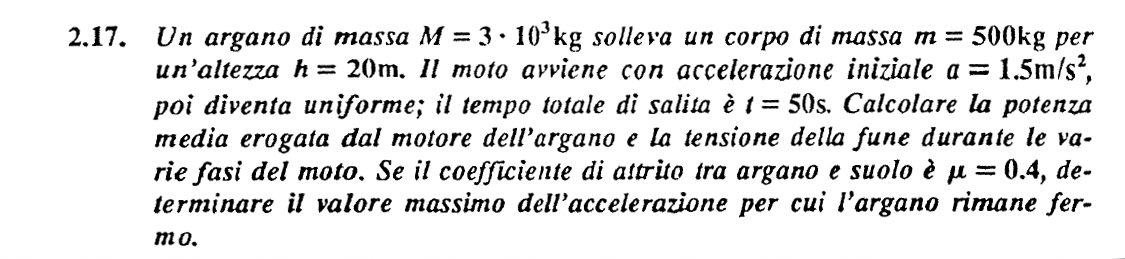

In [32]:
Image('Immagini/MSV_2.17_Testo1.png',width=900)

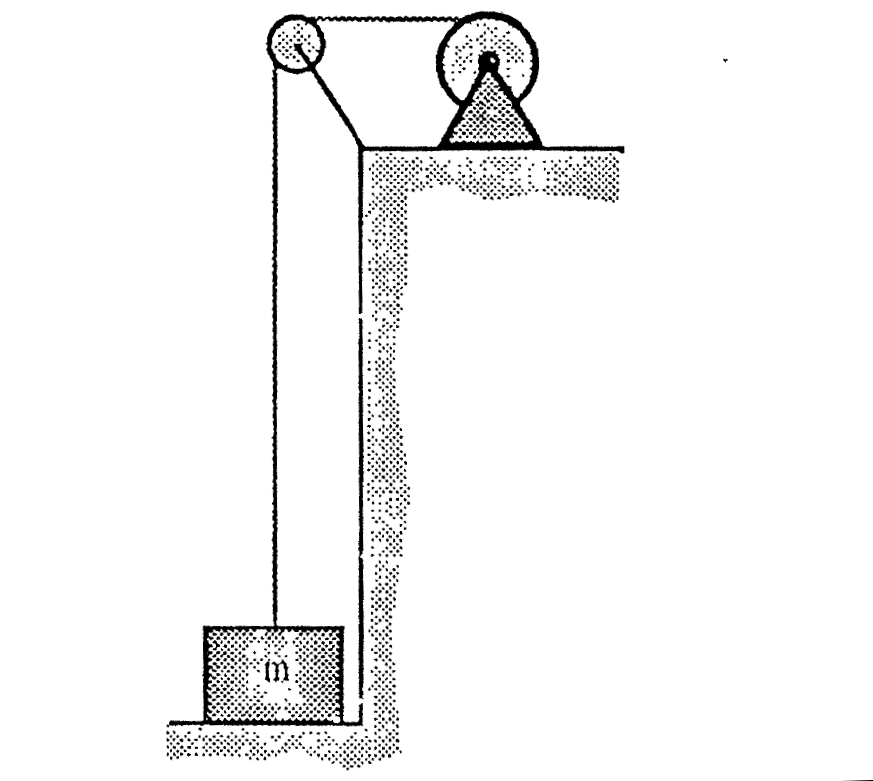

In [34]:
Image('Immagini/MSV_2.17_Testo2.png',width=600)

__Svolgimento__

La potenza media erogata dal motore è definita come il rapporto fra l'energia spesa e il tempo impiegato.
L'energia è utilizzata per aumentare il potenziale gravitazioneale del corpo dalla quota iniziale all'altezza
$h$, abbiamo quindi
$$
P = \frac{mgh}{t}
$$
Notate che il calcolo non ha richiesto la conoscenza dei dettagli del moto.

Numericamente abbiamo

In [2]:
m,M = 500, 3e3 # kg
h = 20 #m
t = 50 #s
mu = 0.4

In [36]:
P = m*g*h/t
P_round = round(P,ndigits)
print('La potenza media erogata dal motore è %s W'%P_round)

La potenza media erogata dal motore è 1960.0 W


Scriviamo le equazioni del moto per $m$
$$
T - mg = ma
$$
da cui ricaviamo la tensione della fune
$$
T = m(g+a)
$$
e osserviamo che $T$ è maggiore in presenza di accelerazione.

L'argano non si muove se la forza massima esercitata su di esso è inferiore al limite dato
dal coefficiente di attrito statico, ovvero
$$
m(g+a) \leq \mu M g
$$
da cui troviamo il valore massimo dell'accelerazione del blocco
$$
a_{max} = g \left( \mu \frac{M}{m}-1 \right)
$$
Sostituiamo i valori numerici

In [5]:
a = g*(mu*M/m-1)
a_round = round(a,ndigits)
print("L' accelerazione massima è %s m/s^2"%a_round)

L' accelerazione massima è 13.72 m/s^2


## MSV - Esercizio 4.12

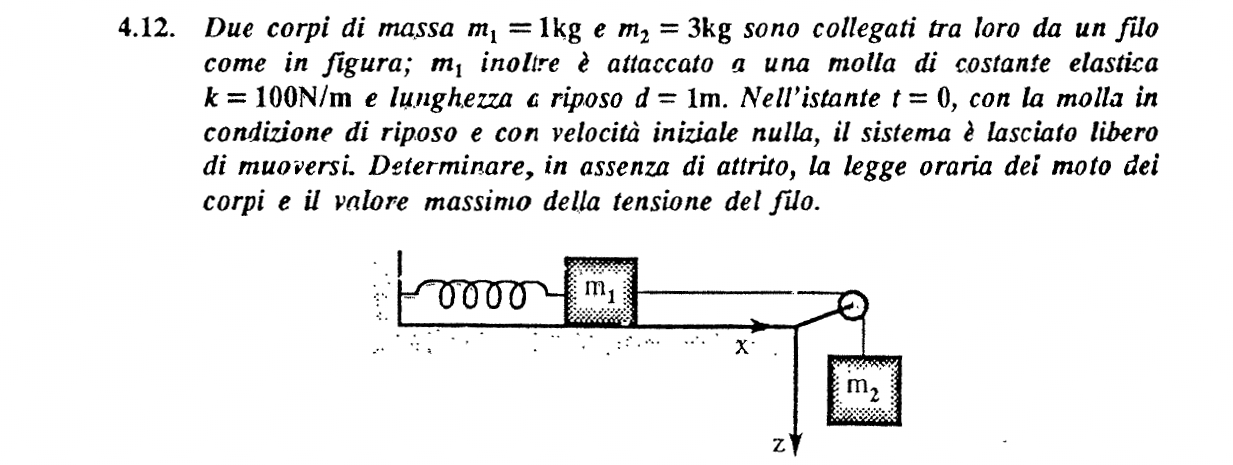

In [30]:
Image('Immagini/MSV_4.12_Testo.png',width=900)

__Svolgimento__

Usiamo l'equazione del moto di $m_2$ (componente verticale)
$$
m_2 g - T = m_2 a
$$
Da questa possiamo scrivere l'equazione del moto per $m_1$ componente orizzontale
senza far apparire la tensione del filo
$$
-k (x-d) + m_2 (g-a) = m_1 a
$$
quindi
$$
\frac{d^2 x}{d t^2} + \frac{k}{m_1+m_2}x = \frac{m_2g + kd}{m_1+m_2}
$$
E' l'equazione di un oscillatore armonico soggetto a un termine di forza esterna costante $F_0$.
La riscriviamo introducendo la pulsazione e abbiamo
$$
\frac{d^2 x}{d t^2} + \omega^2 (x - \frac{F_0}{\omega^2}) = 0
$$
con $\omega^2=\frac{k}{m_1+m_2}$. E parametrizziamo la soluzione come
$$
x(t) = d + \frac{m_2g}{k} + x_0 cos(\omega t)
$$
Abbiamo scelto la dipendenza dal coseno (con una fase nulla) perché sappiamo che la velocità
iniziale deve essere nulla. Imponendo $x(0) = d$ abbiamo $x_0 = - \frac{m_2g}{k}$.
In complesso si ottiene
$$
x(t) = d + \frac{m_2 g}{k}\left(1-cos(\omega t) \right)
$$
La tensione del filo in funzione del tempo si ottiene dall'equazione del moto per $m_2$ sostituendo
l'espressione esplicita di $a$
$$
T = m_2 g \left( 1- \frac{m_2}{m_1+m_2}cos(\omega t) \right)
$$
La tensione è sempre positiva e il valore massimo si ottiene quando $cos(\omega t) = -1$
$$
T_{max} = m_2 g \frac{m_1+2m_2}{m_1+m_2}
$$

In [3]:
m1,m2 = 1,3
T = m2*g*(m1+2*m2)/(m1+m2)
T_round = round(T,ndigits)
print('La tensione massima vale  = %s N'%T_round)

La tensione massima vale  = 51.45 N
